<a href="https://www.kaggle.com/code/ramsesmdlc/house-prices-regression?scriptVersionId=138953079" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [10]:
#Import Libraries 

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

from pandas.plotting import scatter_matrix #???

from scipy.stats import norm #??


from sklearn.impute import SimpleImputer # completing/replacing missing values
from sklearn.preprocessing import StandardScaler # Machine Learning (Scaling data) - Z-Score Normalization)
from sklearn.preprocessing import OneHotEncoder # Machine Learning (One Hot Encoder Categorical Attributes)
from sklearn.pipeline import Pipeline # Machine Learning (Pipeline class for numerical features)
from sklearn.compose import ColumnTransformer # Machine Learning (Transformation of: numerical features + categorical attributes)

from sklearn.metrics import r2_score #??
from sklearn.metrics import mean_squared_error #??
from sklearn.linear_model import LinearRegression #??

from sklearn.model_selection import train_test_split #??
from sklearn.preprocessing import PolynomialFeatures #??

<div class="alert alert-block alert-warning"><b>Point 0, 1:</b> In following steps we are going to apply several tehcniques, methods or procedures to check and assess the training dataset. Furthermore, in these stages we are not going to modify or edit the training dataset.</div>

# __0. Important__

Type of machine learning system to build:

1. Supervised Learning: __Linear Regression (Gradient Descent)__
2. Batch Learning (also called "offline learning")
3. Model-based learning

Goal:
1. __Predict the "sales price" for each house__

# __1. Loading the Data - Training Dataset__

In [11]:
training_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# __2. Quick Exploratory Data Analysis (QEDA) - Training Dataset (Independent Features - Metric Variables)__

There are a lot of variables of different types (object, int64, and float64) in the training set (80 to be precise). Therefore, conducting an exhaustive exploratory data analysis (EDA) of all features may not be worthwhile. 

> __<span style="color:#FF4500"> Non-metric variable = attributes, characteristics or categorical properties = type "object"</span>__

> __<span style="color:#FF4500">Metric variables = quantitavive data = type "int64" and/or type "float64"</span>__

The best approach would be to quickly identify the independent features (metric variables, to be precise) that have a strong Correlation Coefficient "r" (to be specific "Pearson" and/or "Spearman") with the dependent feature "SalePrice" and use them to develop the model. 

__<span style="color:#FF4500">Correlation coefficient "r": It measures how strength is the relationship between two metric variables. (Range: +1 to -1)</span>__

1. __<span style="color:#FF4500">Pearson correlation coefficient:</span>__

> It is computed using "raw data" values.

> Assumption N°1: Data from both variables follow normal distributions.

> Assumption N°2: Data have no outliers.

> Assumption N°3: Data is from a random or representative sample.

> Assumption N°4: Expect a "linear" relationship between the two variables.

2. __<span style="color:#FF4500">Spearman correlation coefficient:</span>__

> It is used when data fail to meet the assumptions of "Pearson correlation coefficient".

> It is computed from the "ranks" (e.g., from lowest to highest) of the data. For instance, if we have a set of data X1 = [400 100 300 200 10], then this set of data could be ranked as X1_Ranked = [5 2 4 3 1]; or a set of data X2 = [10 20 30 40 50], then this set of data could be ranked as X2_Ranked = [1 2 3 4 5]

> It measures the "monotonicity of relationships" (which are less restrictive than linear relationships) between a pair of variables. Each variable changes in only one direction but not necessarily at the same rate. 

> > Positive monotonic: when one variable increases, the other also increases (it does not have to be linear).

> > Negative monotonic: when one variable increases, the other decreases. (it does not have to be linear).

In [12]:
def QEDA(training_data):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe:",'\033[0m', training_data.shape, "\n")
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe:",'\033[0m', "\n")
  training_data.info()
    
  #"Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the metric variables" of the dataframe
      #The code "select_dtypes" allow us to choose data points of the dataframe with specific datatypes.
          #In this case we are interested in datatypes of "int64" and "float64"
      #The output will be a "Series"  
  matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
  corr_Pearson_matrix1 = matrix_selection.corr()
  corr_Pearson_serie = corr_Pearson_matrix1["SalePrice"].sort_values(ascending=False)
  
  #"Spearman's Rank Correlation Coefficient of the metric variables" of the dataframe
      #The output will be a "Series"  
  matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
  corr_Spearman_matrix1 = matrix_selection.corr(method="spearman")
  corr_Spearman_serie = corr_Spearman_matrix1["SalePrice"].sort_values(ascending=False)

  # Print the dataframe to contrast the "Pearson's Correlation Coefficient" vs "Spearman's Rank Correlation Coefficient on metric variables"
    #Transforming the Series to a Dataframe
    #Reseting the index of the dataframes
    #Changing the head of the dataframes
    #Concatenate the dataframes
  corr_Pearson_df = pd.DataFrame(corr_Pearson_serie)
  corr_Spearman_df = pd.DataFrame(corr_Spearman_serie)

  corr_Pearson_df.reset_index(inplace=True)
  corr_Spearman_df.reset_index(inplace=True)

  corr_Pearson_df = corr_Pearson_df.rename(columns = {"index":"Metric Variable","SalePrice":"Pearson Correlation"})
  corr_Spearman_df = corr_Spearman_df.rename(columns = {"index":"Metric Variable","SalePrice":"Spearman Correlation"})

  print("\n" +'\033[1m','\033[94m', "Pearson vs Spearman Correlation Coefficient", '\033[0m' + "\n")
  corr_compare_df = pd.concat([corr_Pearson_df, corr_Spearman_df], axis=1)
  print(corr_compare_df.head(13))

# Call the function
QEDA(training_data)


  Shape of the dataframe:  (1460, 81) 


   Information of the dataframe:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     146

## __2.1. Analysis - Checking Assumptions of Multivariate Analysis (Assumption N°1: Linearity)__

1. __<span style="color:#FF4500">Linearity: "correlation" represents "linear" association between variables; therefore, "nonlinear" effects (cubic, exponential,...) will not be represented (which could lead to underestimate of the actual strength of the relationship). This assumption is the base of techniques such as "Multivariate Regression and Logistic Regression"</span>__

2. __<span style="color:#FF4500">The ways to spot a "nonlinearity issues" are the followings:</span>__ 

> Option 1: (Bivariate Analysis) Use Standard or Spearman Coefficient (***as we did in the section "2. Quick Exploratory Data Analysis (QEDA) - Training Dataset (Independent Features - Metric Variables)"***)

> Option 2: (Bivariate Analysis) Use Scatterplot of dependent variable and independent variable (***the interpretability of the results could be subjective***).

> Option 3: (Bivariate Analysis) Use regression analysis to see the residuals, which reflect the unexplained portion of the dependent variable, and check if our assumption of linear regression was right.

3. __<span style="color:#FF4500">Solution:</span>__ If it confirmed that we are dealing with "nonlinearity" issues we can apply the following techniques:

> Transforming the data of one or both variables (dependent variable and independent variable).

> Create a new variable or variables to represent the nonlinear relationship.

### __2.1.1. Conclusions__

1. Considering that out of the top 13 metric variables (i.e., metric variables with a Correlation Coefficient "r" > 0.50, which is a subjective assumption), have a "Spearman Correlation Coefficient" stronger than "Pearson Correlation Coefficient", we can assume that we are dealing with "a non-linear relationship" between the dependent variable and each one of the great majority of the independet metric variables.

2. Therefore we are going to develop the EDA of the top 13 metric variables (according to the "Spearman Correlation Coefficient"). 

> 12 independent variables

> 1 dependent variable (SalePrice)

# __3. Exploratory Data Analysis (EDA) - Training Dataset (some Independent Features - Metric Variables)__

In [13]:
#Defining the training dataset to be use for fo the EDA
    #This definition is based on the results of section "2. Quick Exploratory Data Analysis (QEDA) - Training Dataset (Independent Features - Metric Variables)"
    #To be specific we choose only the columns (13 columns to be precise) with metric variables and Spearman Correlation Coefficient" > 0.50
matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
training_dataX = matrix_selection[["SalePrice","OverallQual", "GrLivArea", "GarageCars","GarageArea", "TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd","GarageYrBlt","Fireplaces"]]


  Shape of the dataframe - some metric variables:  (1460, 13) 

  Head of the dataframe - some metric variables:  

   SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     208500            7       1710           2         548          856   
1     181500            6       1262           2         460         1262   
2     223500            7       1786           2         608          920   
3     140000            7       1717           3         642          756   
4     250000            8       2198           3         836         1145   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0       856         2             8       2003          2003       2003.0   
1      1262         2             6       1976          1976       1976.0   
2       920         2             6       2001          2002       2001.0   
3       961         1             7       1915          1970       1998.0   
4      1145         2             9

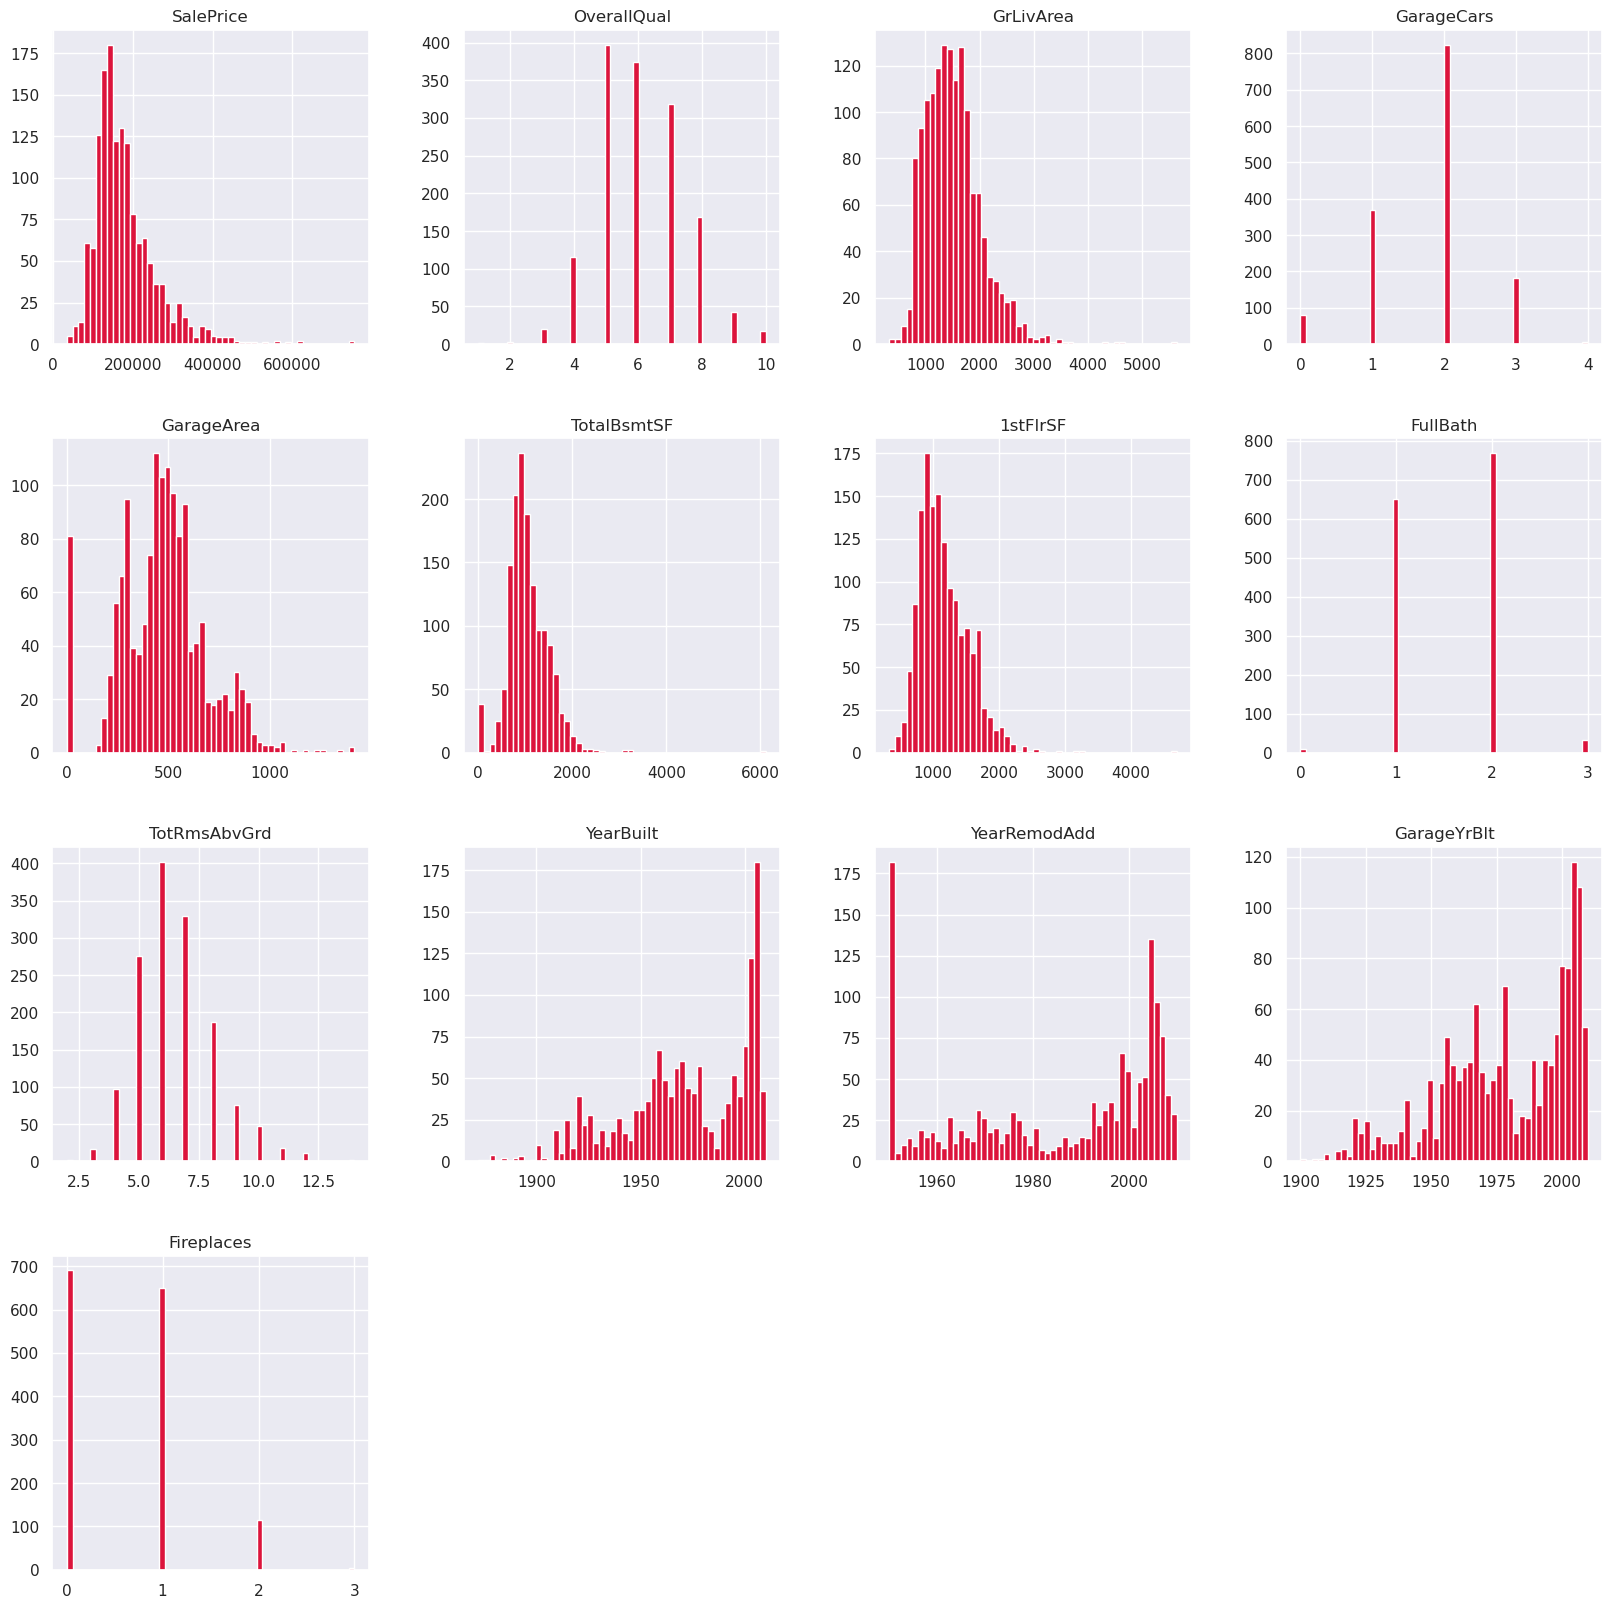


  Boxplots of some metric variables of the dataframe: 



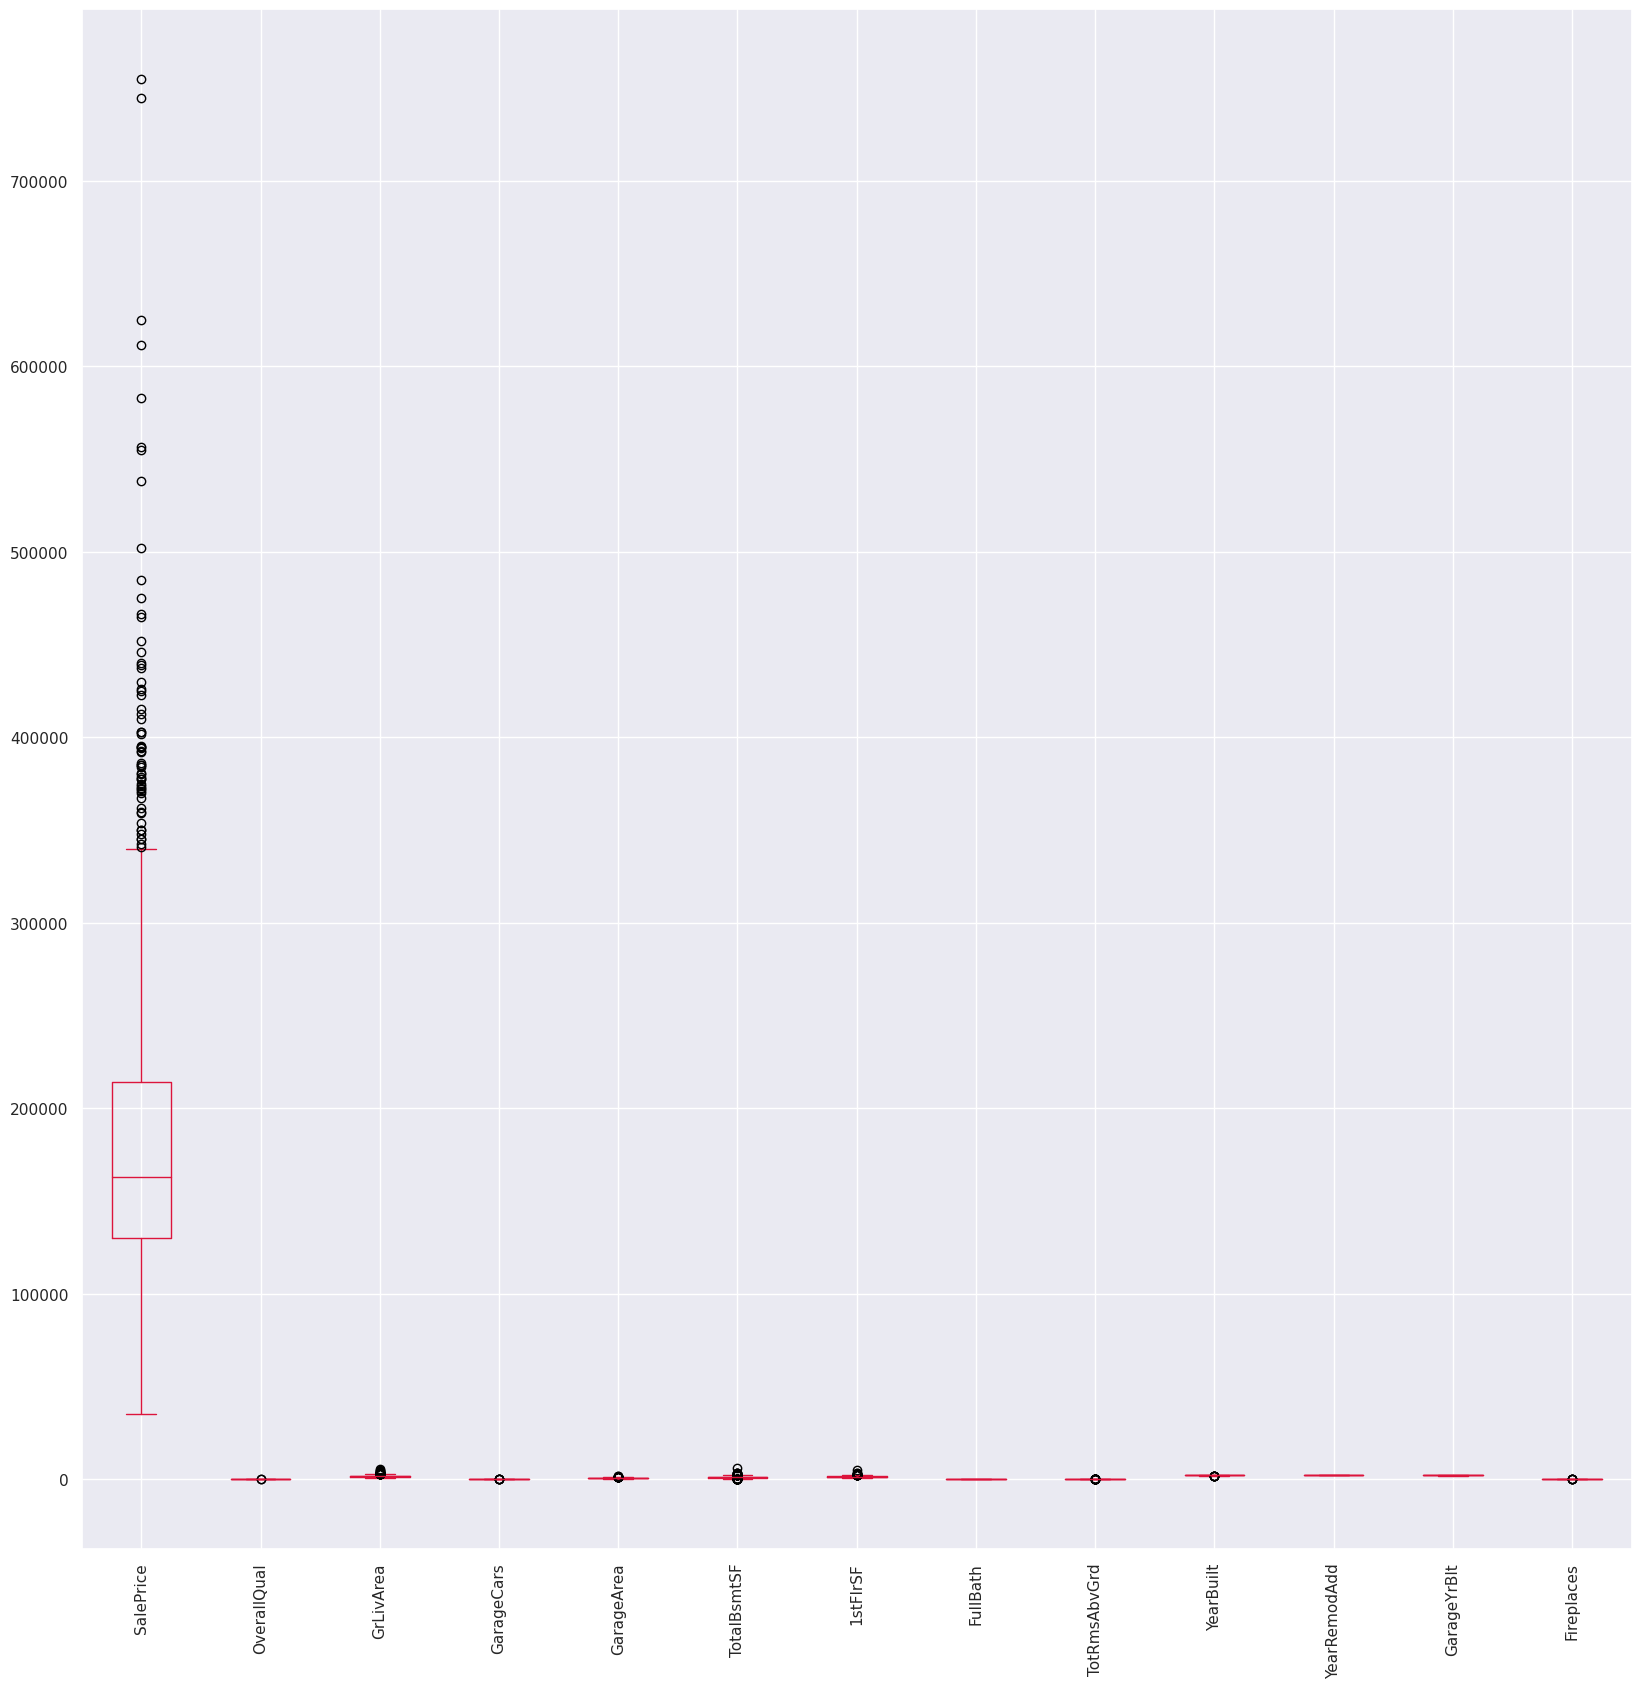


  Spearman Correlation Coefficient of some metric variables of the dataframe: 

              SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
SalePrice      1.000000     0.809829   0.731310    0.690711    0.649379   
OverallQual    0.809829     1.000000   0.603262    0.608756    0.541552   
GrLivArea      0.731310     0.603262   1.000000    0.505094    0.468211   
GarageCars     0.690711     0.608756   0.505094    1.000000    0.853317   
GarageArea     0.649379     0.541552   0.468211    0.853317    1.000000   
TotalBsmtSF    0.602725     0.459915   0.371026    0.455508    0.486685   
1stFlrSF       0.575408     0.408730   0.494421    0.450580    0.489797   
FullBath       0.635957     0.576372   0.658419    0.518310    0.444459   
TotRmsAbvGrd   0.532586     0.427806   0.827874    0.386244    0.330549   
YearBuilt      0.652682     0.647392   0.288493    0.601519    0.528281   
YearRemodAdd   0.571159     0.557723   0.282400    0.456245    0.398267   
GarageYrBlt    0.59

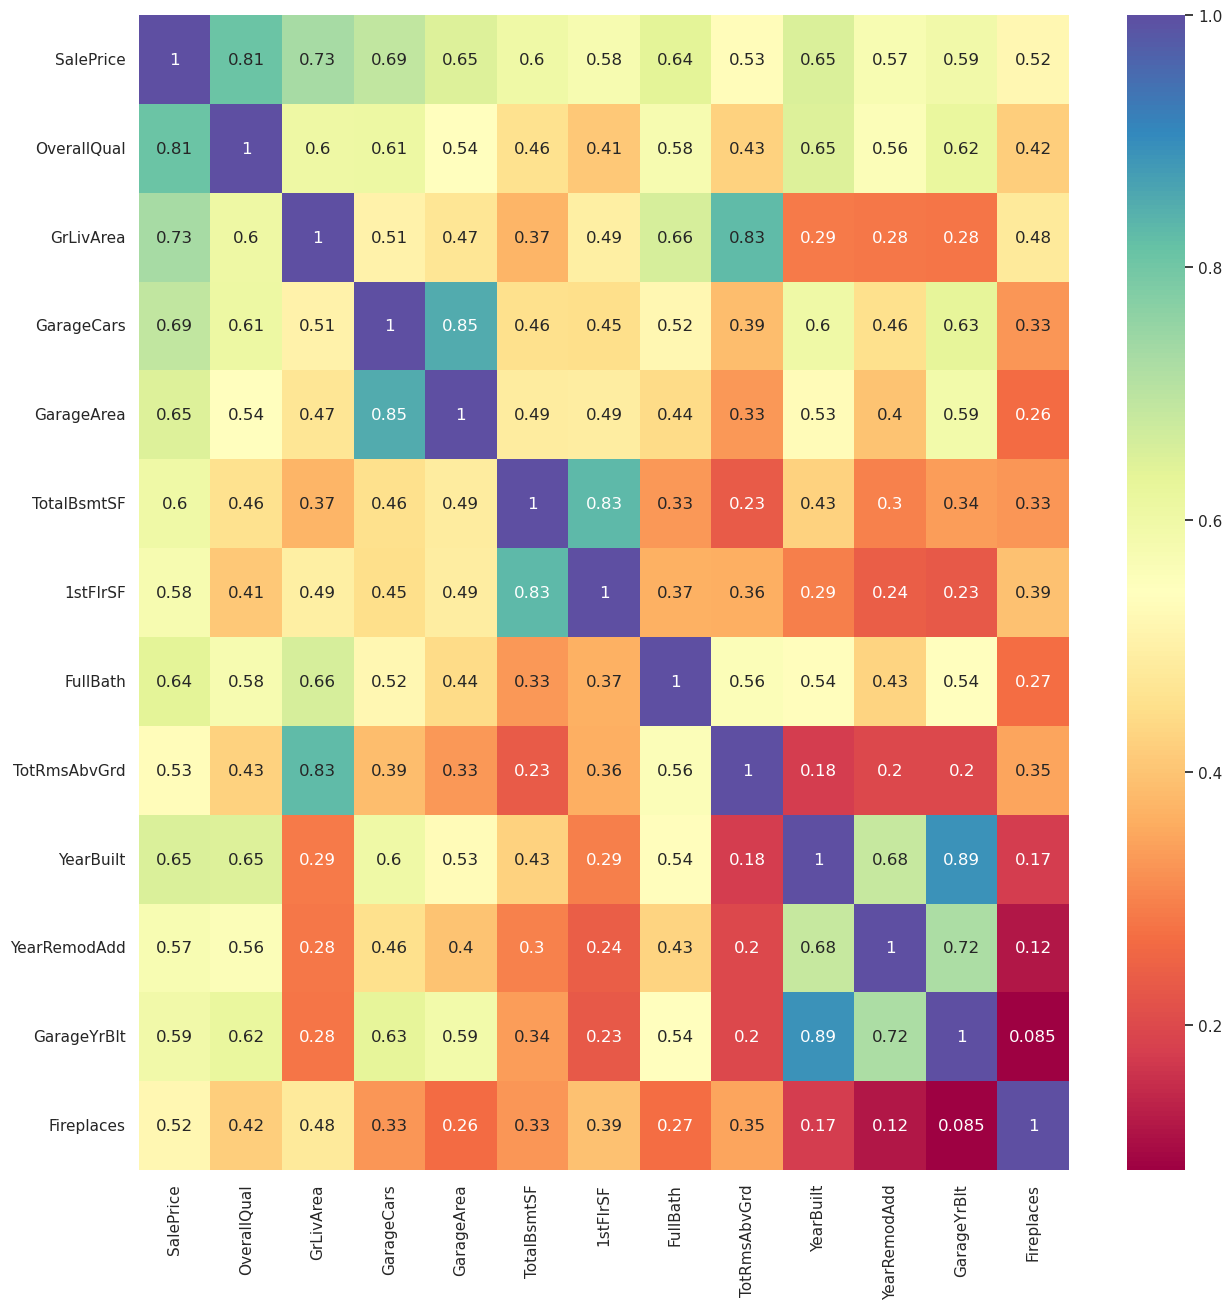

In [14]:
def EDA(training_dataX):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe - some metric variables:",'\033[0m', training_dataX.shape, "\n")
    
  # Print the "head" of the dataframe
  print('\033[1m','\033[94m',"Head of the dataframe - some metric variables:",'\033[0m', "\n")
  print(training_dataX.head())
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe - some metric variables:",'\033[0m', "\n")
  training_dataX.info()
 
  # Print the "number and percentage" of missing values per column" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Number and percentage of missing values per column of some metric variables of the dataframe:", '\033[0m' + "\n")
  missing = training_dataX.isnull().sum()
  percent = missing / training_dataX.shape[0] * 100
  print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

  # Print the "summary statistics" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Summary statistics of some metric variables of the dataframe:", '\033[0m' + "\n")
  print(training_dataX.describe())  
    
  # Plot "histograms" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m',"Histograms of some metric variables of the dataframe:", '\033[0m' + "\n")
  training_dataX.hist(bins= 50, figsize=(20,20),color= "Crimson")
  plt.show()  
    
  # Plot "boxplots" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m',"Boxplots of some metric variables of the dataframe:", '\033[0m' + "\n")
  training_dataX.boxplot(figsize=(20,20), rot=90, color= "Crimson")
  plt.show()
  
  # Print the "Spearman Correlation Coefficient" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Spearman Correlation Coefficient of some metric variables of the dataframe:", '\033[0m' + "\n")
  print(training_dataX.corr(method="spearman"))    
    
  # Plot "heatmap" of the "Spearman Correlation Coefficient" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Spearman Correlation matrix of some metric variables of the dataframe:", '\033[0m' + "\n")
  corr = training_dataX.corr(method="spearman")
  sns.set(rc={"figure.figsize":(15, 15)}) #width, height
  sns.heatmap(corr, annot = True, cmap="Spectral")
  plt.show()
    
# Call the function
EDA(training_dataX)

## __3.1. Analysis - Checking Collinearity__

1. The "Spearman Correlation Coefficient" (table and graph) shows us several cases of "Collinearity"; thereby, giving almost the same information both variables). 

> __<span style="color:#FF4500">Collinearity:  it happens when an "independent variable" is higly correlated with another "independent variable". It reduces the predicitive power of any "independet variable" by the extent to which is related to another "independet variable".</span>__

### __3.1.1. Conclusions__

1. The cases of collinearity are the followings: 

> Case N°1:"GaragaCars" vs "GarageArea" -"Pearson Correlation Coefficient" = 0.85 

> Case N°2:"TotalBsmtSF" vs "1stFlrSF" -"Pearson Correlation Coefficient" = 0.83 

> Case N°3:"TotRmsAbvGrd" vs "GrLivArea" -"Pearson Correlation Coefficient" = 0.83 

> Case N°4:"YearBuilt" vs "GarageYrBlt" -"Pearson Correlation Coefficient" = 0.89 

2. Based on the previous point, ***we only require one of the "independent variables" in each collinear case (i.e. we can keep the "independent variable" with the strongest correlation to the "dependent variable")***. Those "independents metric variables" that we are going to keep are the followings

> Case N°1:"GaragaCars"

> Case N°2:"TotalBsmtSF"

> Case N°3:"GrLivArea" 

> Case N°4:"YearBuilt"

3. Based on the previous point, ***the other "independent variable" of every case will be dropped***. Consequently, the linear model is going to use only 8 independet metric variables. These are the followings:

> OverallQual        

> GarageCars      

> TotalBsmtSF    

> FullBath      

> GrLivArea 

> YearBuilt     

> YearRemodAdd    
    
> Fireplaces 

# __4. Visualize the Data - Training Dataset (some Independent Features - Metric Variables)__


  Scatterplot matrix of some metric variables of the dataframe: 



array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <Axes: xlabel='FullBath', ylabel='SalePrice'>,
        <Axes: xlabel='YearBuilt', ylabel='SalePrice'>,
        <Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>,
        <Axes: xlabel='Fireplaces', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='FullBath', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>,
        <Axes: xlabel='YearRemodAdd', ylabel='OverallQual'>,
        <Axes: x

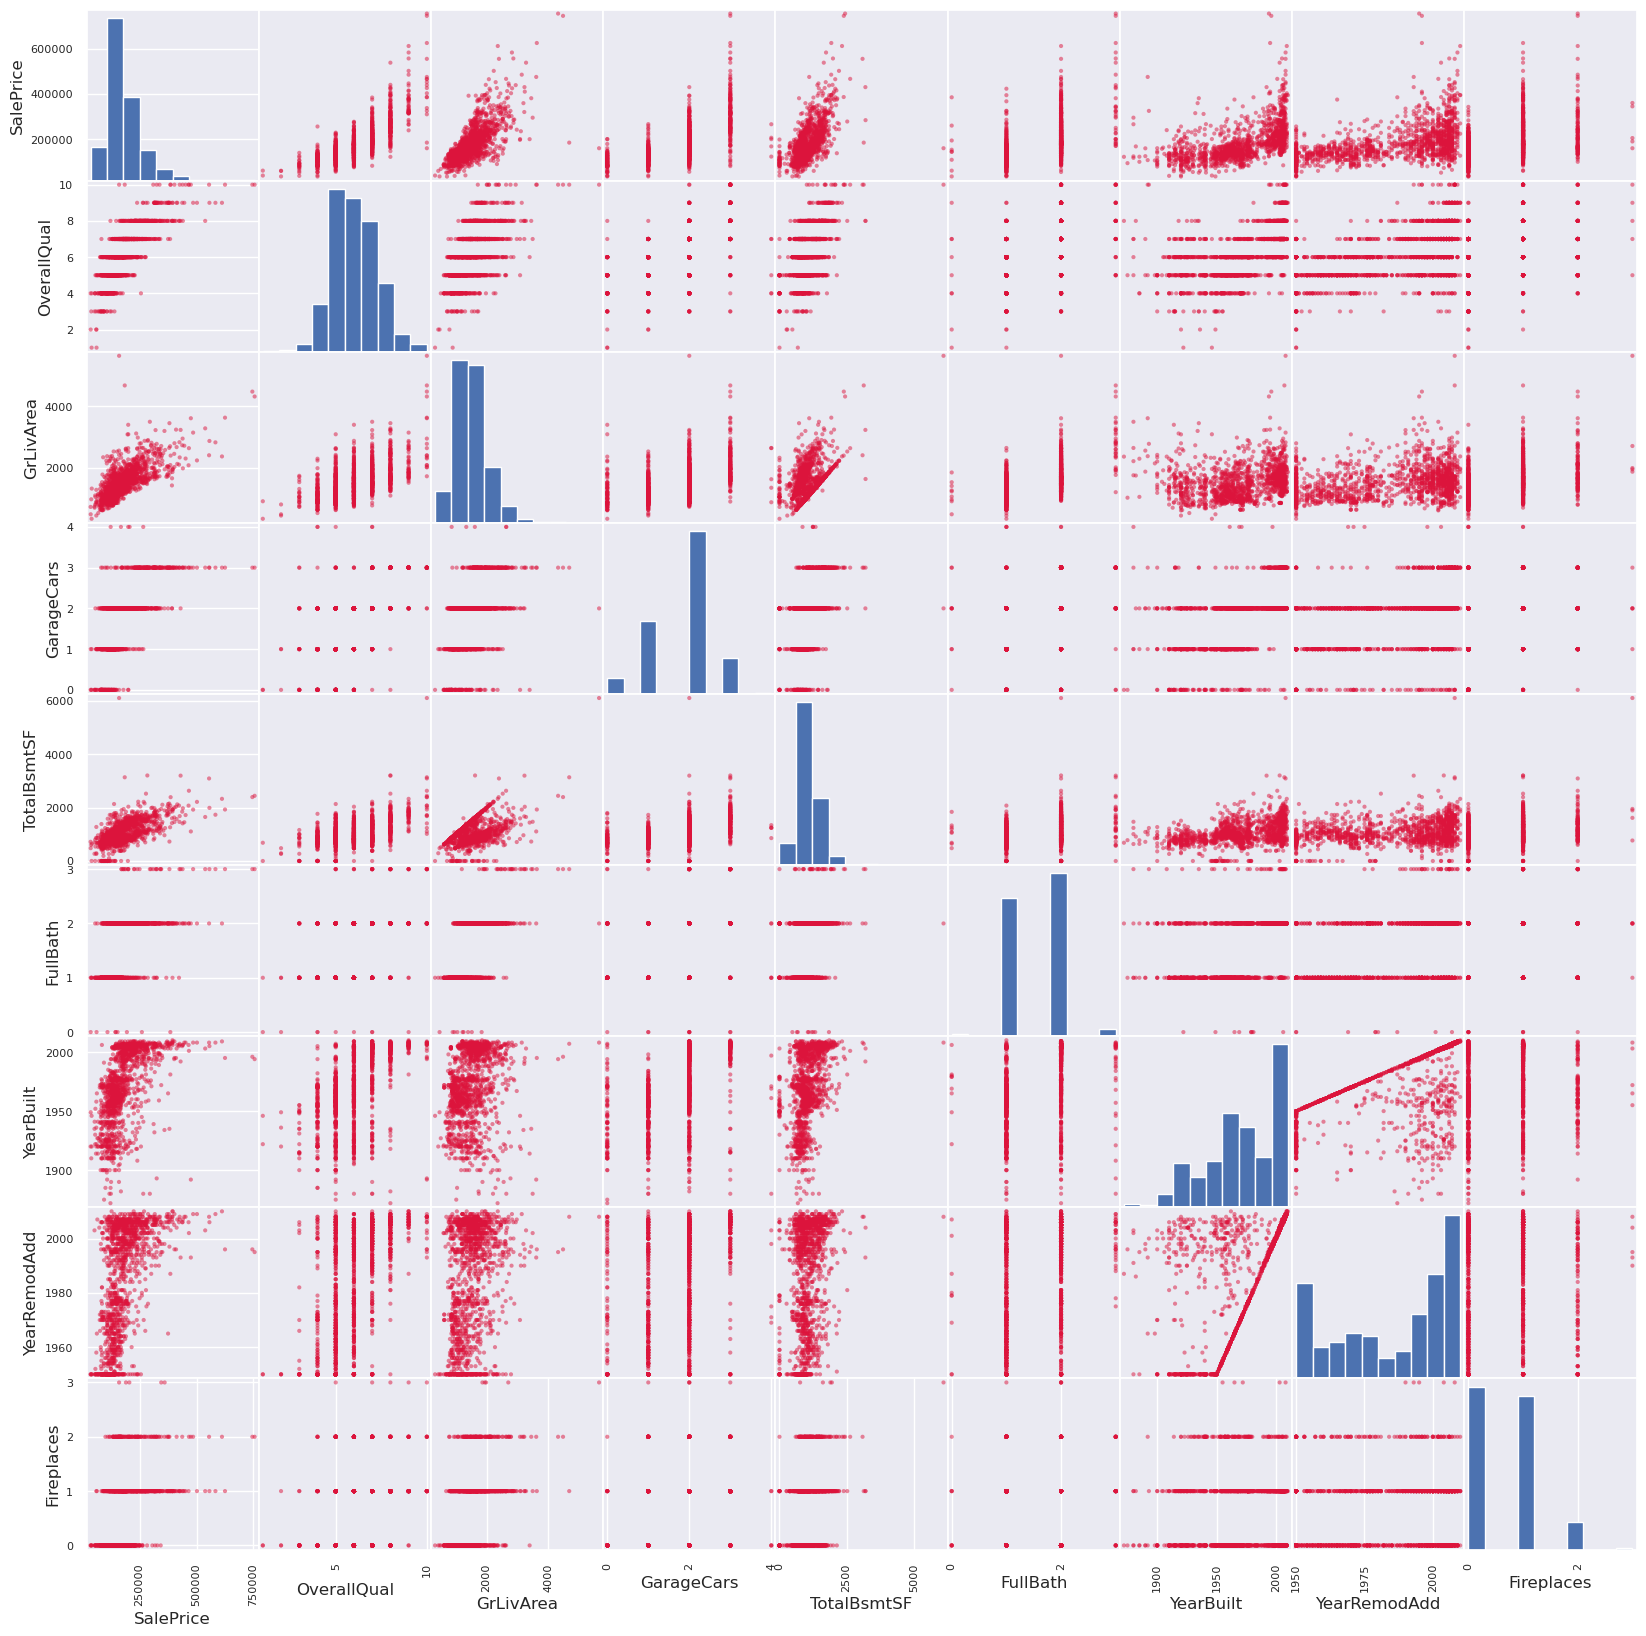

In [19]:
#Plotting a "scatterplot" of some metric variables with high correlation according to the "Spearman Correlation Coefficient"
    #Defining the dataframe (based on "Section 3.1.1. Conclusions")
    
print("\n" +'\033[1m','\033[94m', "Scatterplot matrix of some metric variables of the dataframe:", '\033[0m' + "\n")
training_dataX2 = training_dataX[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd", "Fireplaces"]]
scatter_matrix (training_dataX2, figsize = (20,20),color= "Crimson")

In [67]:
#Checking the "Skewness" and "Kurtosis" of the most important dependent and independent metric...
#...variables ("SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath",...
#..."YearBuilt", "YearRemodAdd", "Fireplaces") according to "Section 3.1.1. Conclusions".

#We are going to check the "Skewness" and "Kurtosis" because the previous "Scatterplot Matrix" shows...
#...us histograms (Uniariate Analysis) with apparently a non-normal shape...so just checking process.

    #DataFrame.skew(axis=0, skipna=True, numeric_only=False, **kwargs)
    #DataFrame.kurt(axis=0, skipna=True, numeric_only=False, **kwargs)
        #Kurtosis obtained using Fisher’s definition of kurtosis (kurtosis of normal == 0.0). 
    
print("\n" +'\033[1m','\033[94m', "Dependent metric variable:", '\033[0m' + "\n")
print("Skewness:", round(training_dataX2['SalePrice'].skew(),2))
print("Kurtosis:", round(training_dataX2['SalePrice'].kurt(),2))

print("\n" +'\033[1m','\033[94m', "Independent metric variables:", '\033[0m' + "\n")
print("Skewness:","\n","\n",round(training_dataX2[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd", "Fireplaces"]].skew(),2))
print("\n")
print("Kurtosis:","\n","\n",round(training_dataX2[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd", "Fireplaces"]].kurt(),2))


  Dependent metric variable: 

Skewness: 1.88
Kurtosis: 6.54

  Independent metric variables: 

Skewness: 
 
 OverallQual     0.22
GrLivArea       1.37
GarageCars     -0.34
TotalBsmtSF     1.52
FullBath        0.04
YearBuilt      -0.61
YearRemodAdd   -0.50
Fireplaces      0.65
dtype: float64


Kurtosis: 
 
 OverallQual      0.10
GrLivArea        4.90
GarageCars       0.22
TotalBsmtSF     13.25
FullBath        -0.86
YearBuilt       -0.44
YearRemodAdd    -1.27
Fireplaces      -0.22
dtype: float64


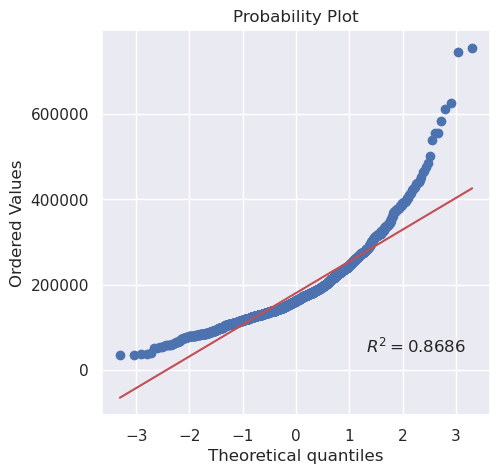

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate some random data from a normal distribution
#np.random.seed(42)
data = training_dataX2['SalePrice']
data1 = training_dataX2['GrLivArea']

# Set the figure size to 10 x 6 inches
#fig = plt.figure(figsize=(10, 6))


# Create a normal probability plot with a best-fit line and r-value
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
res = stats.probplot(data, plot=ax, fit=True, rvalue=True)


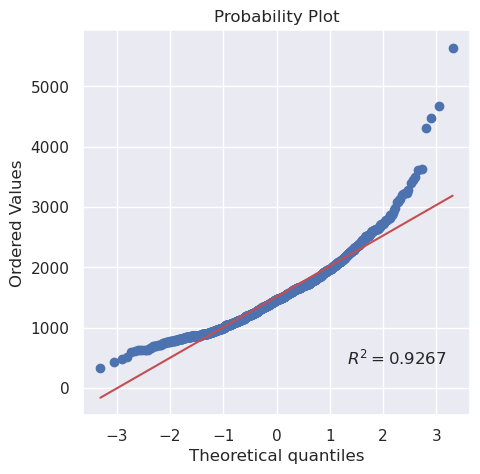

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate some random data from a normal distribution
#np.random.seed(42)
data2 = training_dataX2['GrLivArea']

# Set the figure size to 10 x 6 inches
#fig = plt.figure(figsize=(10, 6))


# Create a normal probability plot with a best-fit line and r-value
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
res2 = stats.probplot(data2, plot=ax, fit=True, rvalue=True)


## __4.1. Analysis - Checking Null values and Missing Data__

1. The "Number and percentage of missing values per column of some metric variables of the dataframe" shows us that it will be necessary to apply ***Imputer Strategy (i.e. apply some Data transformation in a future Pipeline called  "SimpleImputer")*** in some numerical attributes. 

> __<span style="color:#FF4500">Imputer Strategy (Univariate Method): it is helpful for dealing with "null values / missing" data in metric variables. In other words, we can replace the "null values / missing data" of a specific variable with an estimation based on the valid data values (for instance the "mean" or "median" value) of that specific variable.</span>__

2. It is important to consider the following __<span style="color:#FF4500">impacts when we are dealing with "missing data or null values"</span>__:

> There will be a reduction of the sample size available; therefore, to solve this we should drop some observations (missing data or null values) or drop an entire variable. 

> It could lead us to erroneous or biased results (for instance the computation of the "mean of variable" with and without the quantity of observations considered "missing data or null values"); therefore, to solve this we should detect and drop some observations (missing data or null values) or drop an entire variable. 

3. Important __<span style="color:#FF4500">considerations about null values / missing data are described in the following table</span>__:

|Missing data Percentage|Comment|
|--|--|
|<10%     |The missing data in the variable can generally be ignored, except when it happens in a non-ramdon way. In addition, below 10% it is discretionary the use of almost any "Imputation Methods". Finally, The "non-null values" in the variable can be used for any analysis if the decision to no apply an "Imputation Method" to substitute the missing data is taken.|
|||
|>15%     |The variable could be deleted. Before the deletion of the variable, we need to check that there is at least other variable (probably "collinear") able to represent the variable that we are going to delete. We should use an "Imputation Methods"; however, the type of "Imputation Method" will depend of the missing data percentage.|

### __4.1.1. Conclusions__

1. The "independent metric variables" that we are going to use for the model (i.e., "OverallQual, GarageCars, TotalBsmtSF, FullBath, GrLivArea, YearBuilt, YearRemodAdd, Fireplaces") do not have "null values / missing data" according to the results of Section "3. Exploratory Data Analysis (EDA) - Training Dataset (some Independent Features - Metric Variables)", to specific, the sub-sections:

> "Information of the dataframe - some metric variables"

> "Number and percentage of missing values per column of some metric variables of the dataframe"

2. The best we can do to address this issue is to be prepare in case we decide to change the set of independent metric variables; therefore, we are going to use the ***Imputer Strategy (i.e. apply some Data transformation in a future Pipeline called  "SimpleImputer")***. Maybe, those new independent metric variables to use have some null value / missing data. The ***type of imputation that we are going to apply works theoretically*** in the following way:

|Imputation Method|Advantage|Disadvantage|Use|
|--|--|--|--|
|Imputation by Calculating Replacement Values (Mean or Median Substitution)|Easy to apply|Reduce variance of the distribution / Distorts distribution of the data / Depressess observed correlations|Low levels of missing data / Strong relationship among variables.

## __4.2. Analysis - Checking Outliers__

1. __<span style="color:#FF4500">Outlier: it could be an unusual observation (high or low) on a variable or the result of a unique combination of several variables' values that make or produce a unusual value.</span>__

2. It is important to consider the following __<span style="color:#FF4500">impacts when we are dealing with "outliers"</span>__:

> Is it the outlier representative of the population or a specific sector of the population? And based on this analysis, we should decide if drop or retain the outlier.

> Could the outlier lead us to erroneous or biased results in the computation of parameters such as the "mean of variable"; and based on this analysis, we should decide if drop or retain the outlier.

3. Important __<span style="color:#FF4500">considerations about outliers are described in the following lines</span>__:

> Detect Outliers (Univariate Method):

|Number of observations in the sample|Comment|
|--|--|
|<80|It is considered a small smaple. In this case if (standard deviation > +-2.5) after the the process of "Standardization" (i.e., the dataset will be transformed to have a "mean = 0" and "standard deviation = 1"), then we are dealing with observations considered outtliers.|
|||
|>80|It is considered a large smaple. In this case if (standard deviation > +-4.0) after the the process of "Standardization" (i.e., the dataset will be transformed to have a "mean = 0" and "standard deviation = 1"), then we are dealing with observations considered outtliers.|

> Detect Outliers (Bivariate Method): It is called "Bivariate Normal Distribution Confidence Interval (90% - 95% level)". This method will show a ellipse superimposed over a bivariate scatterplot. The main disavantage of this method is that it generates a lot of graphs; therefore,  we should carefully select the variables that we want/need to analyze with this methodology.

### __4.2.1. Checking the BoxPlots__

1. __<span style="color:#FF4500">Boxplot: it represents the distribution of a variable.</span>__

#### __4.2.1.1. Conclusions__

1. The position of the "whiskers" in the dependent variable "SalePrice" show us a great distance to the smallest and the largest observations that are less that one quartile range from the box.

2. Considering the position of the "median value" There is apparently a little bit of skewness in the dependent variable "SalePrice".

3. The "Boxplots of some metric variables of the dataframe" of Section "3. Exploratory Data Analysis (EDA) - Training Dataset (some Independent Features - Metric Variables)" and the "Scatterplot matrix of some metric variables of the dataframe" of Section "4. Visualize the Data - Training Dataset (some Independent Features - Metric Variables)" show us that it will be necessary to apply ***Feature Scaling (i.e. apply some Data transformation in a future Pipeline such a "Standardization or Normalization {also called "Min-Max Scaling}")*** in some numerical attributes. ***Then, we could consider if drop or retain an outlier***.

> This method of "Feature Scaling" will allow us to examine the distribution of observations in a better and clear way.

3. There are "outliers" in the dependent and independent variables.

## __4.3. Analysis - Checking Assumptions of Multivariate Analysis (Assumption N°2: Normality)__

1. __<span style="color:#FF4500">Glossary (Important Concepts).</span>__ 

> Normality: degree to which a "data distribution" corresponds to a "Normal distribution"

> Skewness: measure of the symmetry of a "data distribution" (mostly compared to a "Normal distribution"). The values of the measures range from -1 (Negative Skewness = tail off to the left) to +1 (Positive Skewness = tail off to the right).

> Kurtosis: measure of peakedness or flatness of a "data distribution" (mostly compared to a "Normal distribution"). "Negative Kurtosis value" = "flat distribution" and "Positive Kurtosis value" = "peak distribution". It describes how heavy-tailed or light-tailed a distribution is. A higher kurtosis means more values in the tails, while a lower kurtosis means fewer values in the tails.  A higher kurtosis means that the distribution has more values in the tails, indicating more outliers or extreme values. A lower kurtosis means that the distribution has fewer values in the tails, indicating less variability or dispersion.

> Robustness: ability of a model or statistical technique to perform relatively well even when some statistical assumptions have been violated.

> Normal Probability Plot: graphical comparison of "data distribution" to a "Normal distribution".In the Normal Probability Plot, the "Normal Distribution" is represented by a straight line angled at 45 degrees. The "data distribution" is graphed against this line, which make very easy to spot if we are dealing or not with a "Normal Distribution".

2. __<span style="color:#FF4500">Key ideas of "Normality":</span>__ 

> It is the most fundamental assumption. In fact, if the condition of "Normality" is not met we are going to be in troubles computing statistical parameters such as "F Statistics" and "t-statistics".

> It refers to the "shape" of the data distribution as a way to spot non-normality (i.e., it is a Univariate Analysis).

> There is the concept of "Multivariate Normality" (complex to check) and "Univariate Normality" (easy to check).

3. __<span style="color:#FF4500">The severity of "Non-normality" is based on:</span>__

> The shape of the data sample distribution: the analysis of the shape could be subjective and it is done using the parameters of "Kurtosis" and "Skewness". The values of "Kurtosis" and "Skewness" depend on the type of data distribution as we can see in the following table:

|Normal Distribution|Kurtosis Value|Skewness Value|
|--|--|--|
|Yes|3 (or 0 if Fisher’s definition is used {which is the case when we use the Pandas command "kurt()"} ).|0|
|No|+ or -|+ or -|

> The size of the data sample distribution: a large size sample tends to diminish the detrimental effects of non-normality and increase the statistical power.

|Sample Size|Impact on Normality Analysis|
|--|--|
|<50 observations|Substantial Impact|
|>50 observations|Negligible Impact|

4. Methods __<span style="color:#FF4500">to detect non-normality</span>__:

> Method N°1 (Univariate Method): Using "Histograms" of the data that is going to be analyzed + "Normal Distribution Graph".

> Method N°2 (Univariate Method): Using "Normal Probability Plot" of the data that is going to be analyzed versus "Normal Distribution". ***It is more reliable and precise than Method N°1***

5. The main method __<span style="color:#FF4500">to solve non-normality</span>__ is transforming the data. In fact, solving issues with this "assumption", allow us to solve at the same time issues with the following assumption (i.e. Assumption N°3: Heterosdasticity).

### __4.3.1. Conclusions__

1. AAA


# XXXXXXXXXXXXXXXXX

5.There are numerous non-linear relationships between the independent metric variables and the dependent metric variable (i.e. "SalePrice"); therefore, could be useful:

> To transform some "independent metric features" of the training set by adding a polynomial of each variable in the training set as a new feature.

> For instance, we can see that the mean values of features such as "GrLivArea" and "TotalBsmtSF" are much larger than the mean value of the feature "GaragaCars".

> The histograms of the "YearBuilt" features show signs of skewness and peakedness.

# __5. Separating the Data - Training Dataset__

In [ ]:
#Making a copy of the original training dataset.
training_data2 = training_data.copy()

#Metric Features
    #Making a copy of the training dataset generated in the section "4. Visualize the Data - Training Dataset"
training_data_metric = training_dataX2.copy()
    #Separating some "features" from the "labels" (also called "target value") of the training dataset
        #Because we do not want to apply the same transformations to the "target values" and "features"
        #Dataframe with only some "features" of the training dataset
training_data_metric = training_data_metric.drop("SalePrice", axis=1)
    #Extracting only the headers of some metric features from the original training dataset.
training_data_metric_header = training_data_metric.columns.values.tolist()

#Nonmetric Features
    #Extracting the nonmetric features from the original training dataset.
training_data_nonmetric = training_data.select_dtypes(include=["object"])
    #Extracting only the headers of the nonmetric features from the original training dataset.
training_data_nonmetric_header = training_data_nonmetric.columns.values.tolist()

# __6. Transformation Pipelines__

## __6.1 Training Dataset (only certain metric features + nonmetric features)__

In [ ]:
#Defining the data that is going to used in the pipeline
    #"training_data_metric" was the output from section "5. Separating the Data - Training Dataset"
    #"training_data_nonmetric_header" was the output from section "5. Separating the Data - Training Dataset"
        #Header of the training_data_metric dataframe
training_data_metric_header
        #Header of the training_data_metric dataframe
training_data_nonmetric_header

#Defining the metric pipeline
    #The pair ("name","estimator"("hyperparameter")  are defined for every transformation.     
metric_pipeline = Pipeline([("imputer", SimpleImputer(strategy = "median")),("scaler", StandardScaler())])

#Defining the general pipeline
    #The triplet ("name","estimator","data")  are defined for every transformation. 
full_pipeline = ColumnTransformer([
    ("metric",metric_pipeline,training_data_metric_header),
    ("nonmetric",OneHotEncoder(),training_data_nonmetric_header)    
])

#Applying the transformation through the general pipeline
gpl_array_1 = full_pipeline.fit_transform(training_data2)

#Printing the "Array of certain metric + nonmetric variables (transformed by pipeline)" (just to check!)
print("\n", '\033[1m','\033[94m',"Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
print(gpl_array_1)

#Printing the "Type of the Array of certain metric + nonmetric variables (transformed by pipeline)" (just to check!)
    #If we are working in the "general pipeline" with the code "OneHotEncoder" and a...
    #..."metric_pipeline", it means that we are working with a mix of outputs such as "sparse matrix"...
    #...due to "OneHotEncoder" and a "dense matrix" due to "metric_pipeline" code.
    
    #The definitive output of our "general pipeline" considering the previous mix will depends on the...
    #..."density of the final output matrix" of the "general pipeline". For instance:
        #1. A CSR(Compressed Sparse Row): is a type of Scipy sparse matrix ("sparse matrix") that will be...
        #...the answer of the "general pipeline" if the ratio of nonzero cells (i.e., the "density" is...
        #...lower than 0.3, also described in the code arguments as "sparse_threshold = 0.3").
        
        #2. A dense matrix: is a type of matrix that will be the answer of the "general pipeline" if the...
        #...ratio of nonzero cells (i.e., the "density" is greater than 0.3, also described in the code...
        #...arguments as "sparse_threshold = 0.3"). 
print("\n", '\033[1m','\033[94m',"Datatype of the Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
print(type(gpl_array_1))

#Printing the "Shape of the Array of certain metric + nonmetric variables (transformed by pipeline)" (just to check!)
print("\n", '\033[1m','\033[94m',"Shape of Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
print(gpl_array_1.shape)

#Transforming the "Scipy Sparse Matrix" into a "Dense Numpy Array"
print("\n", '\033[1m','\033[94m',"Dense Numpy Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
gpl_array_1_dm = gpl_array_1.toarray()
print(gpl_array_1_dm)

#Printing the "Datatype of the Dense Numpy Array"(just to check!)
print("\n", '\033[1m','\033[94m',"Datatype of the Dense Numpy Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
print(type(gpl_array_1_dm))

# __7. Training and Evaluation of the Model - Training Dataset__

## __7.1. Adjusting the Training Dataset__

## <span style="color:red"> __THIS IS AN UNFINISHED NOTEBOOK! - I AM STILL WORKING ON IT__</span>


In [ ]:
#Array of certain metric features (transformed by the "general pipeline").
    #Then we transform this array (generated by the "general pipeline") into a dataframe. 
x_training = pd.DataFrame(gpl_array_1_dm)

print("\n", '\033[1m','\033[94m',"Shape of Dataframe of certain metric + nonmetric features (transformed by the pipeline)",'\033[0m', "\n")
print(x_training.shape)

#Dataframe of the feature "SalePrice" (i.e., the "target value" of the training set)
y_training = (training_data["SalePrice"])

print("\n", '\033[1m','\033[94m',"Shape of Dataframe of target value (training set)",'\033[0m', "\n")
print(y_training.shape)

In [ ]:
#Building the linear regression model
linear_model = LinearRegression()
linear_model.fit(x_training, y_training)

# Predict the values of y
y_prediction = linear_model.predict(x_training)

# Compute the "mean squared error" and the Coefficient of Determination "R-squared"

    #Coefficient of Determination "R-squared": it measures the proportion of the "dependent variable" that
    #...can be explained by the "independent variables" (Range: 0 to 1). If the value of "R-squared" is
    #...near to 1 then the greater the explanatory power of the regression equation and better the...
    #...prediction of the dependent variable.
    
mse = mean_squared_error(y_training, y_prediction) # mean squared error
r2 = r2_score(y_training, y_prediction) # R-squared

print(f'Mean squared error: {mse}')
print(f'R-squared: {r2}')

## __7.2. Applying Learning Curves__

In [ ]:
def plot_learning_curves(linear_model, x_training, y_training):
    X_train, X_val, y_train, y_val = train_test_split(x_training, y_training, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        linear_model.fit(X_train[:m], y_train[:m])
        y_train_predict = linear_model.predict(X_train[:m])
        y_val_predict = linear_model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x_training, y_training)
plt.show()            

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0)
X = np.random.normal(size=100)
Y = 3 * X + np.random.normal(size=100)

# Fit a linear regression model
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()

# Get the studentized residuals
student_res = results.outlier_test()['student_res']

# Plot the studentized residuals against the fitted values
plt.scatter(results.fittedvalues, student_res)
plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.title('Studentized Residual Plot')
plt.show()

#############################

# Import the libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Define the degree of the polynomial
degree = 2

# Create the polynomial features
poly = PolynomialFeatures(degree)
X = poly.fit_transform(training_dataX['x'].values.reshape(-1, 1))

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, df['y'])

# Predict the values of y
y_pred = reg.predict(X)

# Compute the standard error of the regression coefficients
n = len(training_dataX) # sample size
p = degree + 1 # number of parameters
se = np.sqrt(np.diag(np.linalg.inv(X.T @ X) * mean_squared_error(df['y'], y_pred)))
print(f'Standard error: {se}')

# Compute the residual standard error
rss = np.sum((training_dataX['y'] - y_pred) ** 2) # residual sum of squares
rse = np.sqrt(rss / (n - p)) # residual standard error
print(f'Residual standard error: {rse}')

# Compute the null and alternative hypotheses
# The null hypothesis is that all the regression coefficients are zero, except the intercept
# The alternative hypothesis is that at least one of the regression coefficients is not zero
H0 = f'H0: beta_1 = beta_2 = ... = beta_{degree} = 0'
H1 = f'H1: beta_i != 0 for some i in {{1, 2, ..., {degree}}}'
print(f'Null hypothesis: {H0}')
print(f'Alternative hypothesis: {H1}')

# Compute the t-statistics and p-values for each coefficient
from scipy.stats import t

t_stat = reg.coef_ / se # t-statistics
p_val = 2 * (1 - t.cdf(np.abs(t_stat), n - p)) # p-values

print(f't-statistics: {t_stat}')
print(f'p-values: {p_val}')

# Compute the R-squared and adjusted R-squared
r2 = r2_score(df['y'], y_pred) # R-squared
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p) # adjusted R-squared

print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

#################

# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.inspection import plot_linear_model_residuals

# Generate some random data
np.random.seed(0)
X = np.random.normal(size=100).reshape(-1, 1)
Y = 3 * X + np.random.normal(size=100).reshape(-1, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Plot the residuals of the linear model
plot_linear_model_residuals(model, X, Y)
plt.show()

############## work

# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot

# Generate some random data with 3 independent variables and 1 response variable
np.random.seed(42)
N = 100 # number of samples
X = np.random.randn(N, 3) # independent variables
y = np.random.randn(N) # response variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Transform the independent variables into polynomial terms of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a multiple polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Create a residuals plot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train_poly, y_train) # fit the training data
visualizer.score(X_test_poly, y_test) # evaluate on the test data
visualizer.show() # show the plot

# Identify outliers based on the residuals plot
# Outliers are points that have large absolute residuals or are far from the fitted line
outliers = np.where(np.abs(visualizer.residuals_) > 2)[0] # get the indices of outliers
print(f"There are {len(outliers)} outliers in the data:")
print(df.iloc[outliers]) # print the outliers


# __References__

1. **Multivariate Data Analysis (Seventh Edition)**
> Joseph F. Hair Jr / William C. Black / Barry J. Babin / Rolph E. Anderson

2. **An Introduction to Statistical Learning**
> Gareth James / Daniela Witten / Trevor Hastie / Robert Tibshirani

3. **Hands-on Machine Learning with Scikit Learn, Keras and TensorFlow (Second Edition)**
> Aurélien Gerón